In [ ]:
!pip install pytdc
!pip install pandas

## LOAD DATASET

In [2]:
import pandas as pd

data = pd.read_csv("Lipophilicity.csv")
data.head()


,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...


## EXTRACT FEATURE FROM SMILES

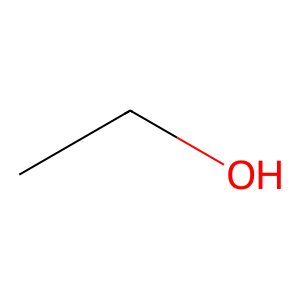

In [6]:
from rdkit import Chem
from rdkit.Chem import Draw,Descriptors,rdmolops
from IPython.display import display
smiles=input("enter a smiles string pls")
mol=Chem.MolFromSmiles(smiles)
# Show molecular info
def featurize(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return [
        Descriptors.MolWt(mol),
        Descriptors.NumHDonors(mol),
        Descriptors.NumHAcceptors(mol),
        Descriptors.MolLogP(mol),
        Descriptors.TPSA(mol)
    ]




display(Draw.MolToImage(mol))

## build the dataset

In [5]:
X = []
y = []

for i, row in data.iterrows():
    feats = featurize(row["smiles"])
    if feats is not None:
        X.append(feats)
        y.append(1 if row["exp"] >1 else 0)  # or 'target' depending on dataset


## spliting dataset so that we can train and test


In [10]:
!pip install scikit-learn


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## model preparation



In [12]:
!pip install numpy


In [13]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()




In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


## Table making

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(" Accuracy:\n", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Accuracy:
 0.8345238095238096

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.32      0.42       158
           1       0.86      0.95      0.90       682

    accuracy                           0.83       840
   macro avg       0.74      0.64      0.66       840
weighted avg       0.81      0.83      0.81       840


 Confusion Matrix:
 [[ 50 108]
 [ 31 651]]


## FINAL RESULT

In [ ]:
!pip install pandas

In [19]:
import pandas as pd
pd.set_option("display.width", 1000)
pd.set_option("display.max_columns", None)


In [21]:
import pandas as pd

# 1. Create a DataFrame from X_test (test features)
X_test_df = pd.DataFrame(
    X_test,
    columns=["MolWt", "HDonors", "HAcceptors", "LogP", "TPSA"]
)

# 2. Add true labels and predicted labels
X_test_df["True Label"] = y_test
X_test_df["Predicted"] = y_pred
# 3. Add a column to check if prediction is correct
X_test_df["Correct?"] = X_test_df["True Label"] == X_test_df["Predicted"]
print(X_test_df.head(10))



     MolWt  HDonors  HAcceptors     LogP    TPSA  True Label  Predicted  Correct?
0  366.804      1.0         3.0  4.11690   62.55           1          1      True
1  341.451      2.0         4.0  3.24140   58.56           1          1      True
2  492.428      3.0         5.0  5.09260   91.32           0          1     False
3  281.381      1.0         5.0  1.29180   54.46           1          1      True
4  386.779      3.0         4.0  2.05610   95.50           1          1      True
5  514.629      1.0         5.0  7.26442   72.94           1          1      True
6  458.400      3.0         6.0  3.66580  125.79           0          0      True
7  359.794      2.0         5.0  2.29450   87.72           1          0     False
8  145.165      1.0         3.0  1.21200   51.80           1          1      True
9  253.240      1.0         5.0  1.98928   80.00           1          1      True


## VISUALISATION


In [22]:
!pip install plotly


In [23]:
import plotly.express as px

fig = px.scatter(
    X_test_df,  # Use the actual DataFrame name
    x='MolWt',
    y='LogP',
    color='Predicted',
    hover_data=['TPSA', 'HDonors', 'HAcceptors'],
    title='Toxicity Prediction by Molecular Properties'
)

fig.show()


## YOUR INPUT DATA TO KNOW WHETHER ITS TOXIC OR NOT
please enter input in smile representation

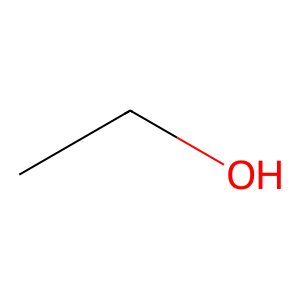


🔍 Molecular Properties:
• Molecular Weight     : 46.07
• H-Bond Donors        : 1
• H-Bond Acceptors     : 1
• LogP (Lipophilicity) : -0.00
• TPSA (Polar Surface) : 20.23
🟢 This molecule is predicted to be NON-TOXIC.


MolWt                                                                          LogP                                                                HDonors                                              HAcceptors                                                 TPSA                                                          
           count        mean         std      min       25%      50%       75%      max  count      mean       std     min      25%     50%      75%      max   count      mean       std  min  25%  50%  75%  max      count      mean       std  min  25%  50%  75%   max  count       mean        std   min    25%    50%     75%     max
Predicted                                                                                                                                                                                                                                                                                                                                   
0           81.0  346.044444  117.850860  113.160  255.7450  341.433  449.4950  679.649   81.0  2.118999  1.641667 -1.9714  0.78890  1.8726  3.52720  5.41322    81.0  2.000000  1.140175  0.0  1.0  2.0  3.0  5.0       81.0  4.901235  1.940393  1.0  4.0  5.0  6.0  10.0   81.0  85.935926  26.770313  29.1  69.97  87.14  104.63  148.77
1          759.0  398.014765  100.038401  128.174  329.3655  399.366  469.5515  837.058  759.0  3.488084  1.227831 -0.0176  2.63696  3.4393  4.27655  8.42120   759.0  1.598155  1.082627  0.0  1.0  1.0  2.0  6.0      759.0  5.280632  2.152873  0.0  4.0  5.0  7.0  17.0  759.0  79.516706  29.942223   0.0  57.69  79.80   98.20  216.89

In [28]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# Your featurization function (make sure it's same as used in training)
def featurize(mol):
    if mol is not None:
        return [
            Descriptors.MolWt(mol),
            Descriptors.NumHDonors(mol),
            Descriptors.NumHAcceptors(mol),
            Descriptors.MolLogP(mol),
            Descriptors.TPSA(mol)
        ]
    else:
        return None

# Input one SMILES from user
smiles = input("Enter a SMILES string to check toxicity: ")
display(Draw.MolToImage(mol))
# Convert to molecule and featurize
mol = Chem.MolFromSmiles(smiles)
features = featurize(mol)
molwt = Descriptors.MolWt(mol)
h_donors = Descriptors.NumHDonors(mol)
h_acceptors = Descriptors.NumHAcceptors(mol)
logp = Descriptors.MolLogP(mol)
tpsa = Descriptors.TPSA(mol)

print("\n🔍 Molecular Properties:")
print(f"• Molecular Weight     : {molwt:.2f}")
print(f"• H-Bond Donors        : {h_donors}")
print(f"• H-Bond Acceptors     : {h_acceptors}")
print(f"• LogP (Lipophilicity) : {logp:.2f}")
print(f"• TPSA (Polar Surface) : {tpsa:.2f}")


# Predict toxicity
if features:
    y_pred_single = model.predict([features])[0]
    if y_pred_single == 1:
        print("🔴 This molecule is predicted to be TOXIC.")

    else:
        print("🟢 This molecule is predicted to be NON-TOXIC.")
else:
    print("❌ Invalid SMILES string. Please try again.")

X_test_df.groupby("Predicted")[["MolWt", "LogP", "HDonors", "HAcceptors", "TPSA"]].describe()

